In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from scipy import stats #to find qq plot, helps to analyse normalised data

In [2]:
df = pd.read_csv('concreteData.csv')
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
609,236.0,0.0,0.0,193.0,0.0,968.0,885.0,180,24.10
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28,32.04
141,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
195,194.7,0.0,100.5,165.6,7.5,1006.4,905.9,14,24.99
900,150.0,237.0,0.0,174.0,12.0,1069.0,675.0,28,37.43


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [8]:
x_train.shape, x_test.shape

((824, 8), (206, 8))

In [9]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [10]:
r2_score( y_test, pred)

0.6359646484072217

In [11]:
# cross validation

np.mean(cross_val_score(lr, x, y, scoring='r2'))

0.4609940491662864

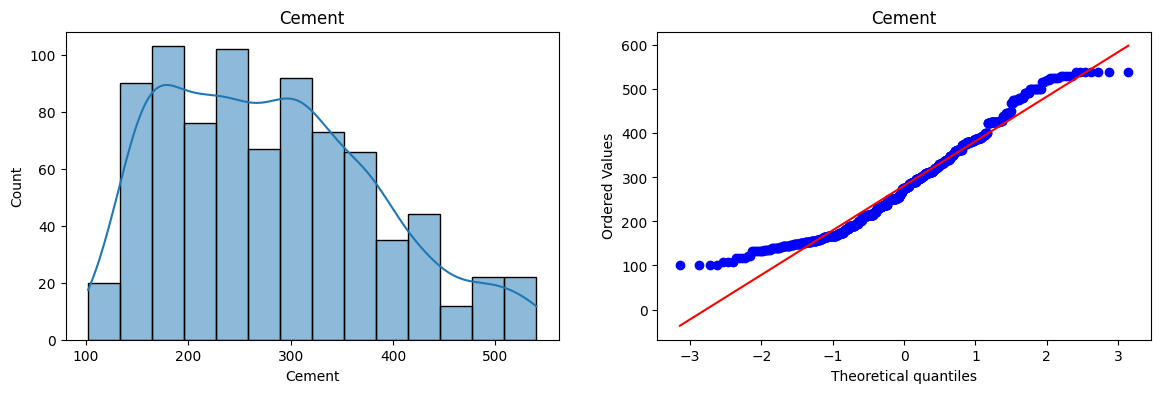

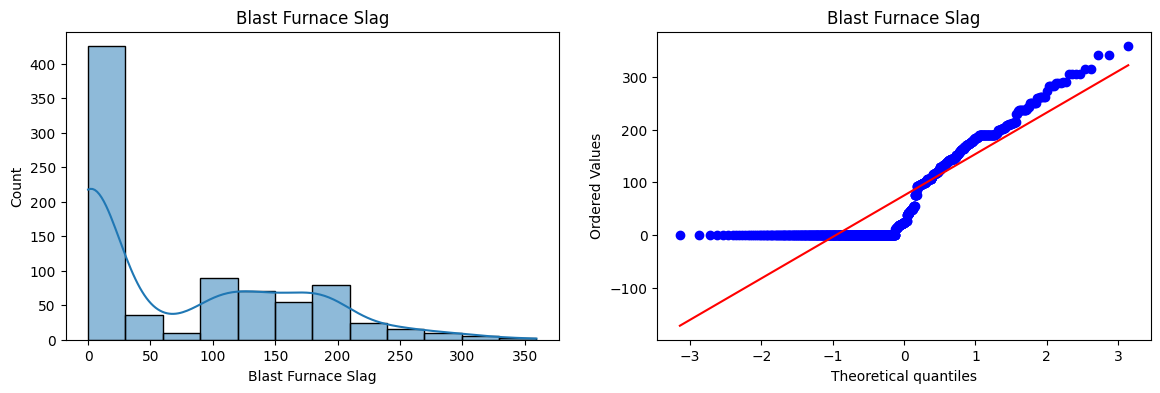

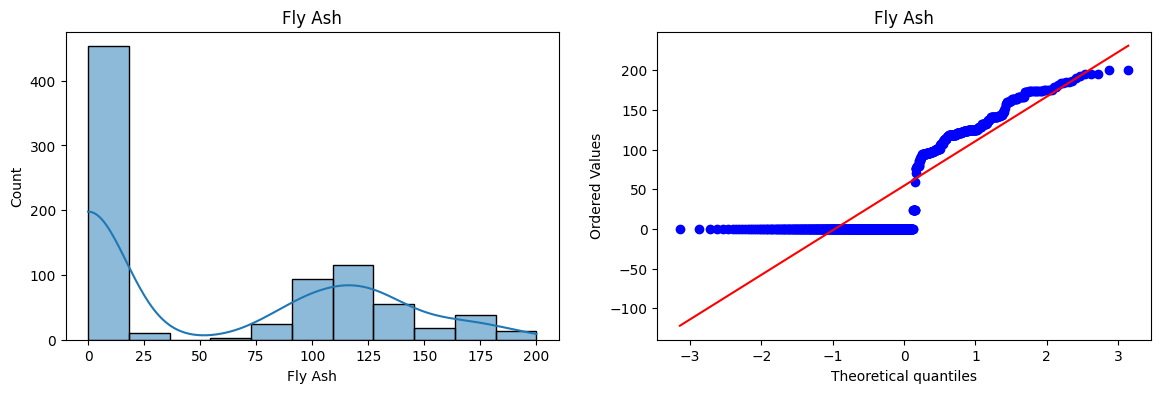

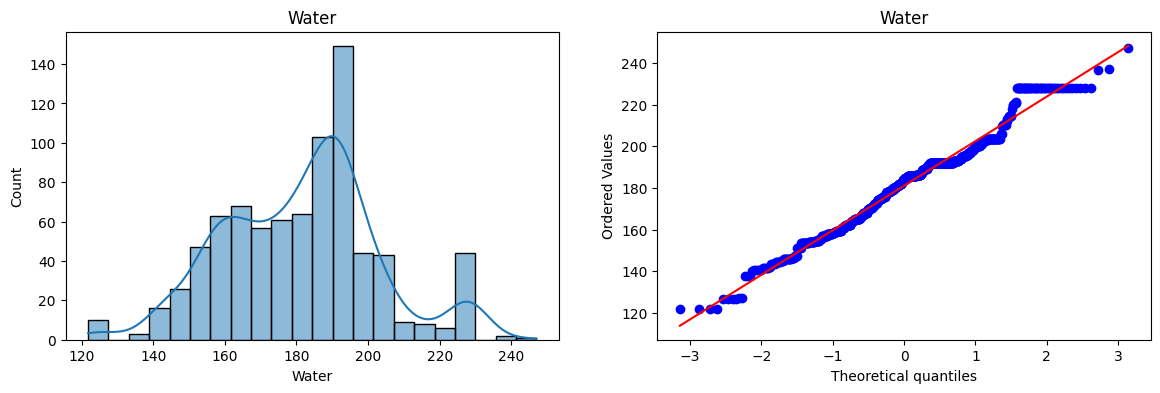

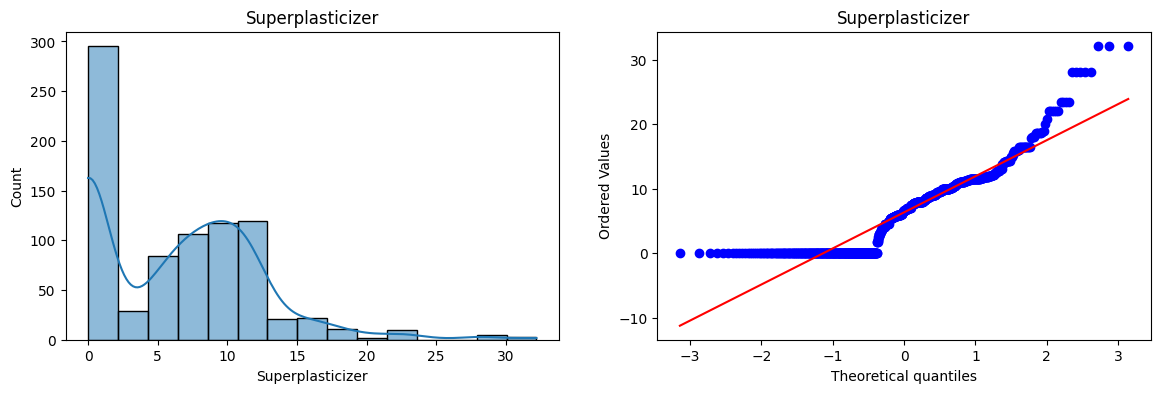

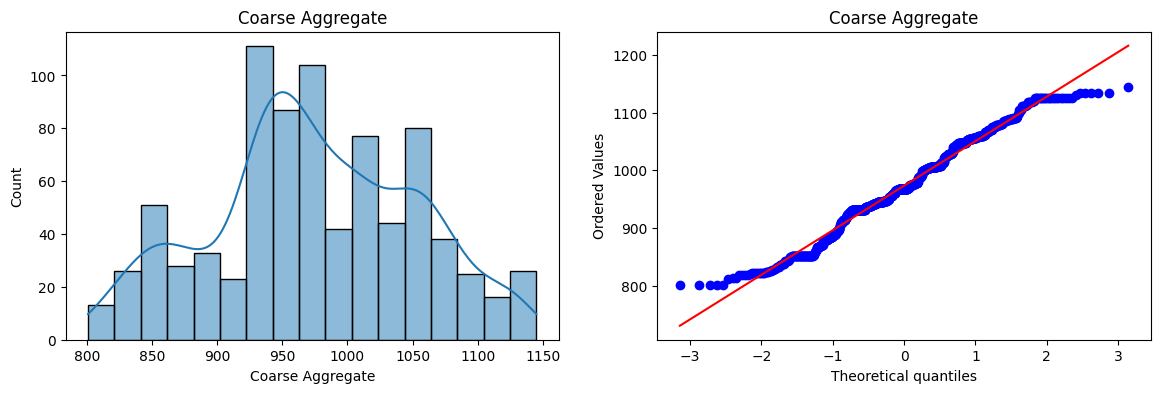

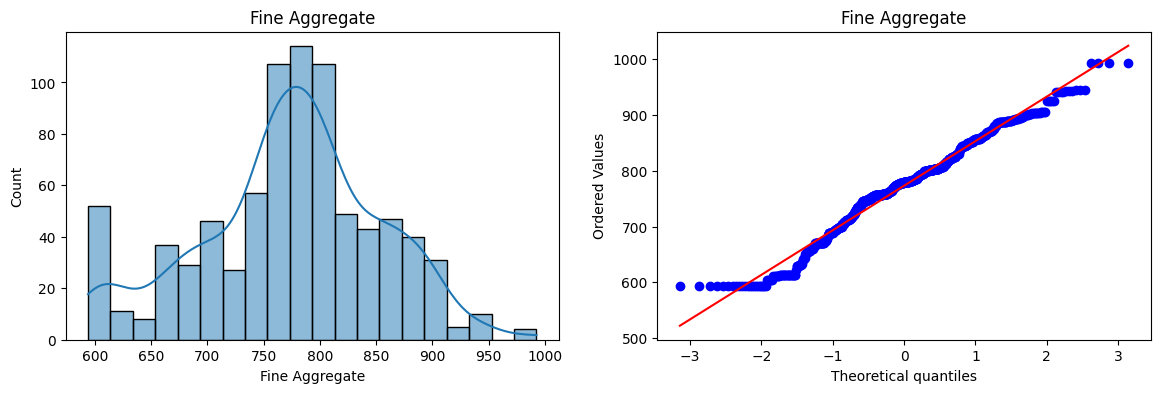

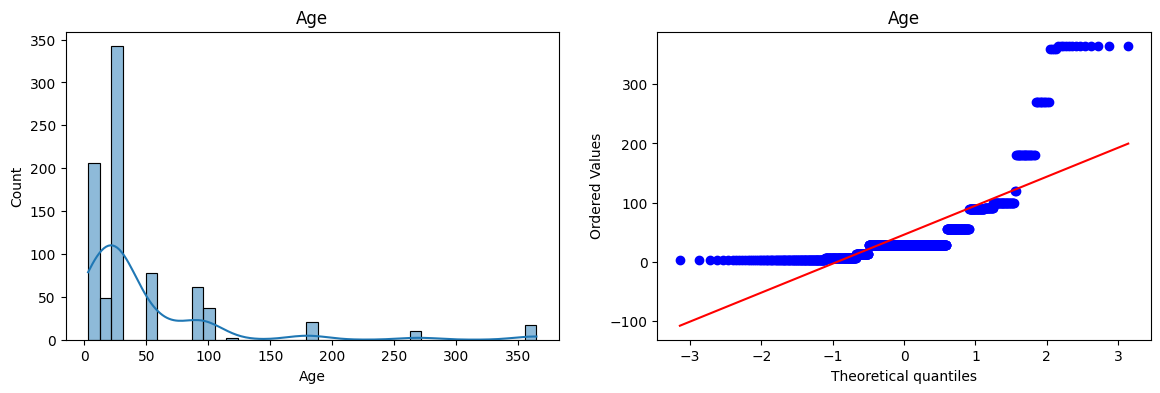

In [12]:
for cols in x_train.columns :
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[cols], kde=True)
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(x_train[cols], dist='norm', plot = plt)
    plt.title(cols)

    plt.show()


In [13]:
pt = PowerTransformer()

x_train_trans = pt.fit_transform(x_train)
x_test_trans = pt.fit_transform(x_test)

In [14]:
pd.DataFrame({'cols':x_train.columns,'lambdas':pt.lambdas_})

,cols,lambdas
0,Cement,0.050069
1,Blast Furnace Slag,-0.028851
2,Fly Ash,-0.140310
3,Water,1.038942
4,Superplasticizer,0.099451
5,Coarse Aggregate,1.306483
6,Fine Aggregate,1.956172
7,Age,0.002945


In [15]:
lr.fit(x_train_trans, y_train)
pred2 = lr.predict(x_test_trans)

r2_score(y_test, pred2)

0.8033350799969853

In [16]:
# cross validation

x_trans = pt.fit_transform(x)
np.mean(cross_val_score(lr, x_trans, y, scoring='r2'))

0.6834625134285748

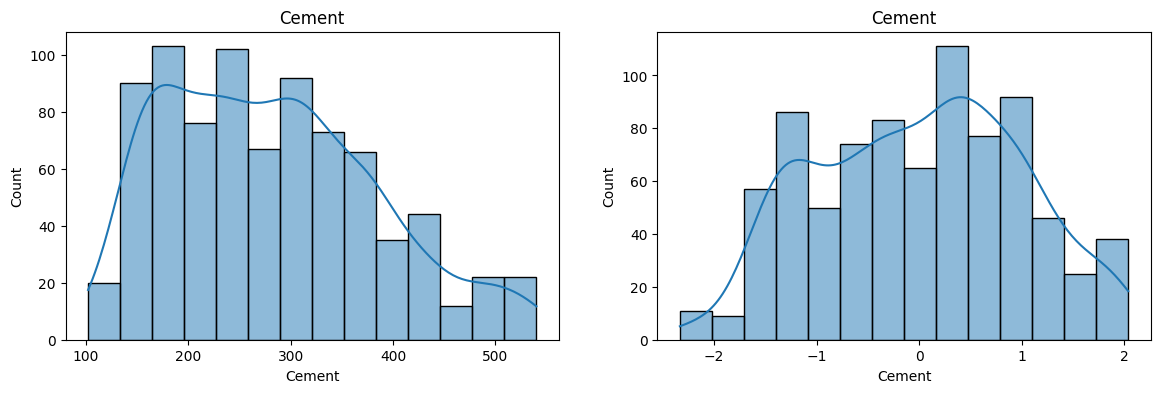

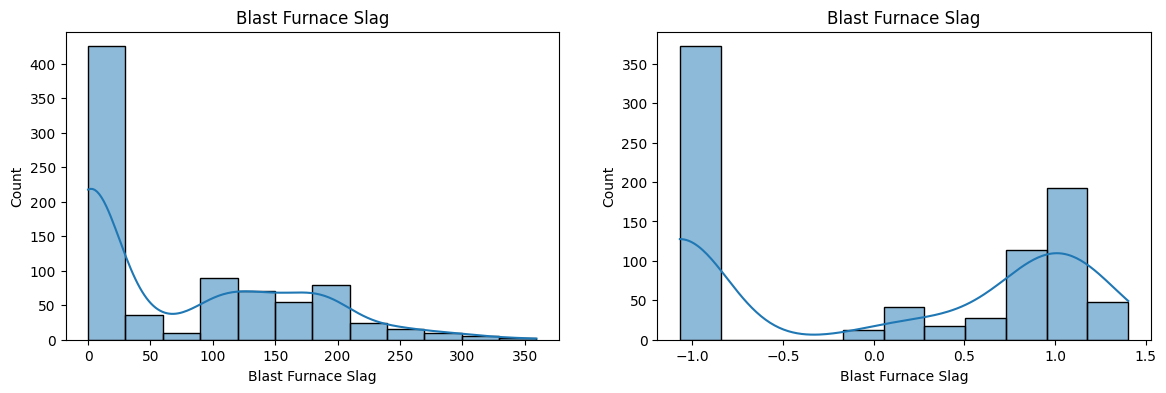

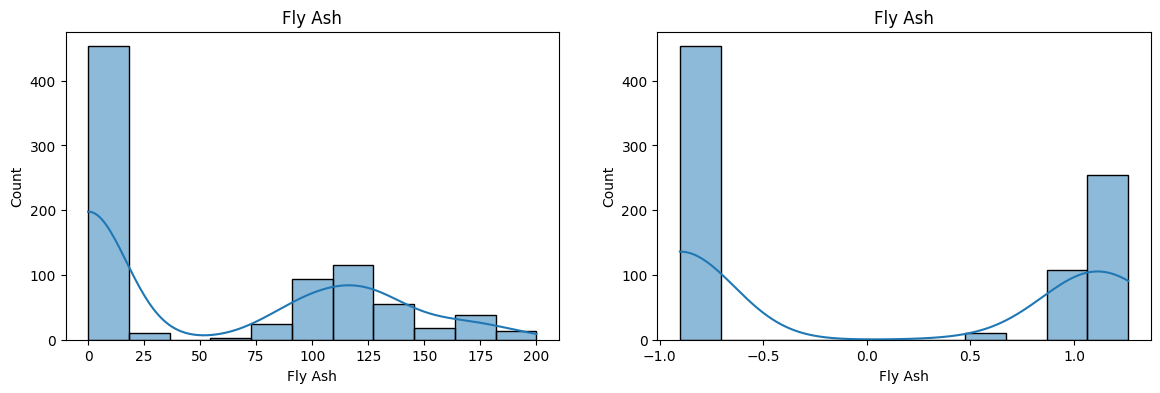

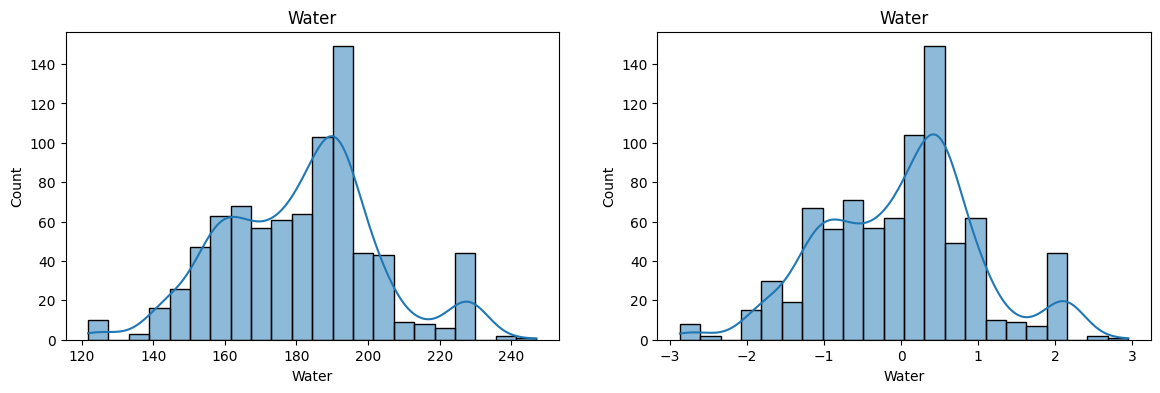

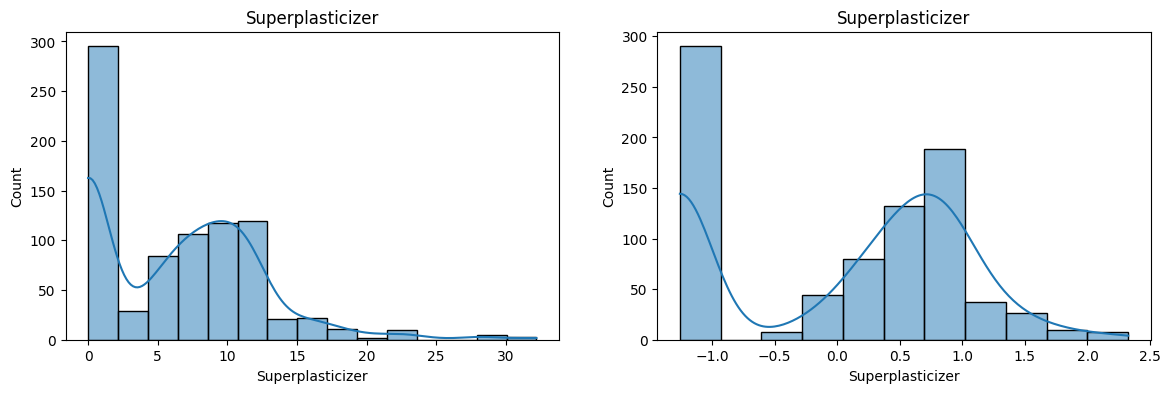

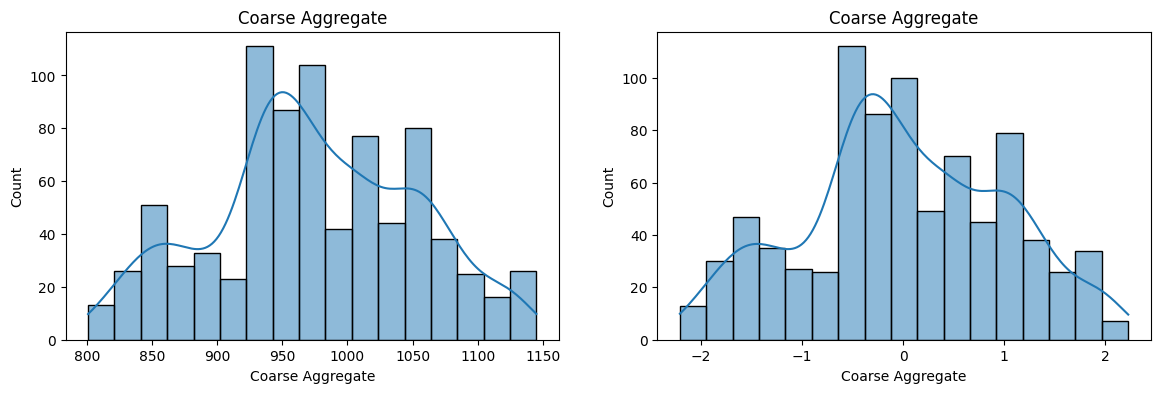

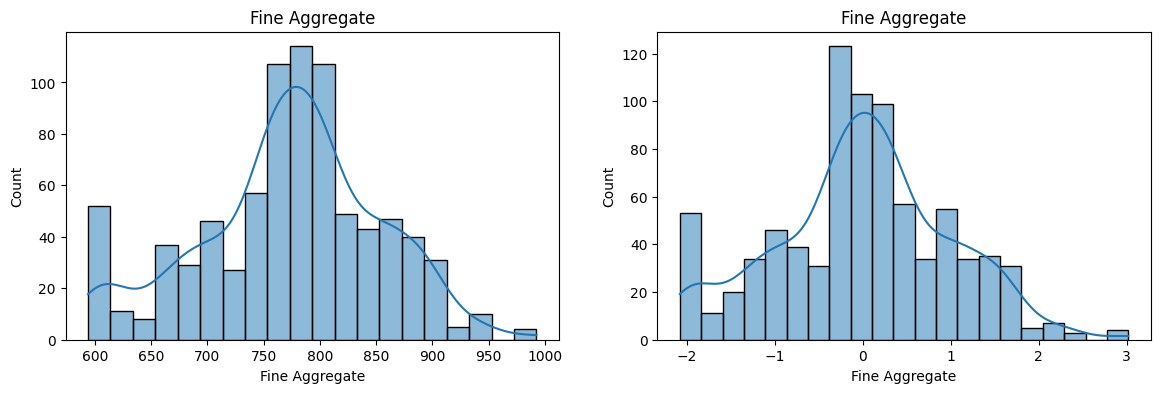

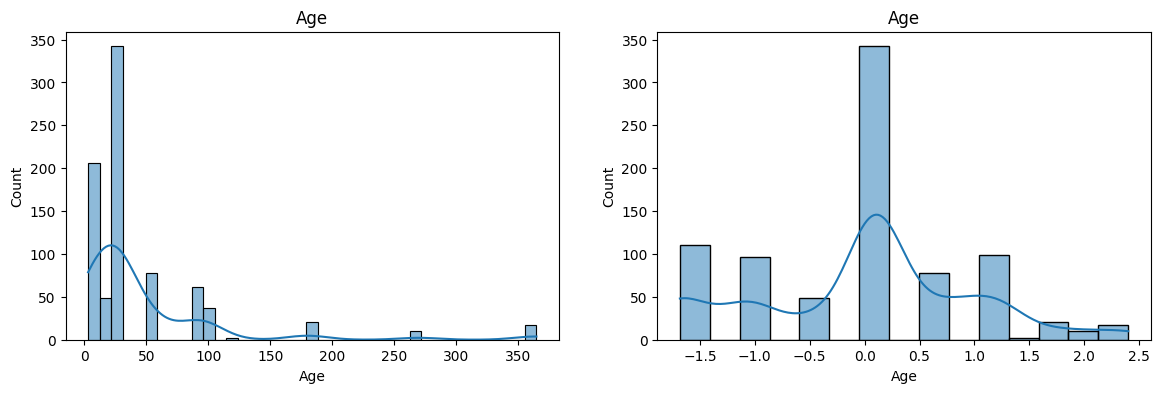

In [17]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(x_train_trans,columns=x_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(x_train[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)

    plt.show()